In [116]:
import pandas as pd

In [125]:
df = pd.read_csv('netflix_titles.csv')

In [142]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,7+,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,18+,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,7+,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,7+,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,16+,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [127]:
df['date_added'].isnull().sum()

11

In [128]:
len(df)

6234

In [129]:
df = df.drop(columns=['show_id'])

In [130]:
#Primeira pergunta, qual diretor ou diretores dirigiram mais filmes
df['director'].value_counts().index[0]

'Raúl Campos, Jan Suter'

In [131]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [132]:
dic = {'TV-PG': '7+' , 'TV-Y7': '7+' , 'TV-Y7-FV': '7+' , 'TV-MA': '18+' , 'TV-14': '16+' , 'R':'18+','TV-Y':'Todos','NR':'18+'
       ,'PG-13':'13+','TV-G':'Todos','PG':'7+','G':'Todos','NC-17':'18+' ,'UR':'Não Classificado'}

In [133]:
df['rating'] = df['rating'].map(dic)

In [156]:
df[df['type'] =='TV Show']['rating'].value_counts()

18+      697
16+      660
7+       438
Todos    172
Name: rating, dtype: int64

In [157]:
#Qual faixa etária possui mais filmes 
df[df['type'] =='Movie']['rating'].value_counts()

18+                 2058
16+                 1038
7+                   711
13+                  286
Todos                157
Não Classificado       7
Name: rating, dtype: int64

In [135]:
df[df['rating'] == 'Não Classificado']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
332,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,Não Classificado,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
799,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","October 1, 2019",2007,Não Classificado,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."
1754,Movie,Shootout at Lokhandwala,Apoorva Lakhia,"Sanjay Dutt, Sunil Shetty, Amitabh Bachchan, A...",India,"May 15, 2019",2007,Não Classificado,116 min,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow..."
2461,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,"June 6, 2019",1974,Não Classificado,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...
3029,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",2016,Não Classificado,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
3441,Movie,Aquarius,Kleber Mendonça Filho,"Sonia Braga, Maeve Jinkings, Irandhir Santos, ...","Brazil, France","January 13, 2017",2016,Não Classificado,146 min,"Dramas, International Movies",The final holdout in her historic beachside bu...
4436,Movie,White Girl,Elizabeth Wood,"Morgan Saylor, Brian 'Sene' Marc, Justin Barth...",United States,"December 2, 2016",2016,Não Classificado,90 min,"Dramas, Independent Movies",A college girl romping through New York City i...


In [143]:
#Quais filmes com categoria não classificados existem?
indices = [df[df['rating'] == 'Não Classificado'].index[i]  for i in range(len(df[df['rating'] == 'Não Classificado']))]
df['title'].loc[indices]

332     You Don't Mess with the Zohan
799                   Good Luck Chuck
1754          Shootout at Lokhandwala
2461                    Immoral Tales
3029                         Sex Doll
3441                         Aquarius
4436                       White Girl
Name: title, dtype: object

<AxesSubplot:>

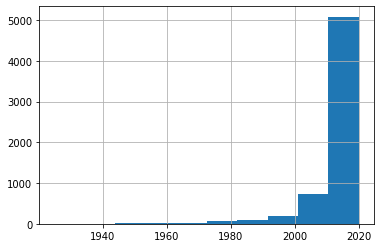

In [137]:
df['release_year'].hist()

In [138]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [139]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,7+,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,18+,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,7+,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,7+,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,16+,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,18+,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,18+,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,18+,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
